
# Step 1: Import Necessary Libraries

In [1]:
# Import necessary libraries
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# In this step, we import the necessary Python libraries for our deep  learning project. These libraries include NumPy for numerical operations, TensorFlow and Keras for building and training neural networks, and Matplotlib for data visualization.

# Step 2: Check TensorFlow Version

In [2]:
# Check TensorFlow version
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.14.0


# Here, we print the version of TensorFlow to ensure we are using the correct version for our project. It's essential to use compatible versions of libraries to avoid compatibility issues.

# Step 3: Define a Constant for Autotuning

In [3]:
# Define a constant for autotuning
AUTO = tf.data.experimental.AUTOTUNE


# We define a constant named AUTO and set it to tf.data.experimental.AUTOTUNE. This constant is used to enable TensorFlow's data pipeline autotuning, which optimizes data loading and preprocessing for improved performance. Autotuning allows TensorFlow to dynamically adjust parameters based on available system resources.
These initial steps help set up the environment and libraries and ensure that we are using the correct versions for our machine learning project.

# Step 4: Define Image Size, Batch Size, and Number of Channels

In [4]:
# Define image size, batch size, and number of channels
IMAGE_SIZE = 224  # Adjust based on your dataset's image size
BATCH_SIZE = 32  # You can adjust batch size as needed
CHANNELS = 3


# In this step, we define key constants for working with the dataset and training the model.
IMAGE_SIZE represents the desired size of input images. It's set to 224, but you should adjust it based on your dataset's image size.
BATCH_SIZE determines the number of images processed in each training batch. You can adjust it based on your available memory and desired training speed.
CHANNELS represents the number of color channels in the images. Typically, RGB images have 3 channels.

# Step 5: Load the Dataset from a Directory

In [5]:
# Load the dataset from a directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "C:/Users/Aviral/Documents/archive (2)/soybean.leaf.dataset - Copy",  # Update the path
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2688 files belonging to 3 classes.


# In this step, we load the dataset of images from a specified directory.
tf.keras.preprocessing.image_dataset_from_directory is a convenient function for loading image data and creating a TensorFlow dataset.
The first argument should be updated with the path to your dataset directory.
shuffle=True randomizes the order of samples in the dataset, which is common practice during training.
image_size is set to (IMAGE_SIZE, IMAGE_SIZE), which resizes images to the specified size.
batch_size is set to BATCH_SIZE, determining the number of images in each batch for training.

# Step 6: Print Class Names

In [6]:
# Print class names
class_names = dataset.class_names
print("Class names:", class_names)


Class names: ['CaterPillar', 'Healthy', 'diabrotica']


# In this step, we retrieve and print the class names present in the dataset.
dataset.class_names returns a list of class names based on the subdirectories in the dataset directory.
This step helps you understand the categories or classes in your dataset.

# Step 7: Print the Shape of Images and Labels

In [7]:
# Print the shape of images and labels
for images, labels in dataset:
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    break


Images shape: (32, 224, 224, 3)
Labels shape: (32,)


# In this step, we print the shape of image batches and their corresponding label batches.
The loop iterates through the dataset once and prints the shape of the first batch.
This step is useful for verifying that the data loading and preprocessing have been done correctly.
Images shape: (batch_size, IMAGE_SIZE, IMAGE_SIZE, CHANNELS) - This is the shape of the image batch.
Labels shape: (batch_size,) - This is the shape of the label batch.
These steps are essential for setting up the dataset for training and verifying that the data has been loaded correctly. Adjust the IMAGE_SIZE and BATCH_SIZE values according to your dataset and hardware constraints.







# Step 8: Define a Function to Split the Dataset

In [8]:
# Define a function to split the dataset into training, validation, and test sets
def get_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


# In this step, we define a Python function called get_dataset that takes the dataset as input and splits it into training, validation, and test sets.
The function allows you to specify the split ratios (train_split, val_split, test_split) and whether or not to shuffle the data.
It also allows you to specify the shuffle_size, which determines the size of the buffer for shuffling when shuffle is enabled.
The function returns three datasets: train_ds, val_ds, and test_ds.

# Step 9: Split the Dataset

In [9]:
# Split the dataset
train_ds, val_ds, test_ds = get_dataset(dataset, train_split=0.8, val_split=0.1, test_split=0.1)


# In this step, we use the get_dataset function to split the loaded dataset into training, validation, and test datasets.
We specify the split ratios: 80% for training, 10% for validation, and 10% for testing.

# Step 10: Print the Lengths of the Datasets

In [10]:
# Print the lengths of the training, validation, and testing datasets
print("Length of Training Dataset is", len(train_ds))
print("\nLength of Validation Dataset is", len(val_ds))
print("\nLength of Testing Dataset is", len(test_ds))


Length of Training Dataset is 67

Length of Validation Dataset is 8

Length of Testing Dataset is 9


# Finally, we print the lengths (number of samples) of the training, validation, and testing datasets.
This step is important to verify that the data has been split correctly according to the specified ratios.
These steps ensure that you have separated your dataset into appropriate subsets for training, validation, and testing. You can adjust the split ratios as needed for your specific machine learning task.







# Step 11: Optimize Data Pipeline Performance

In [11]:
# Optimize data pipeline performance for training dataset
train_ds = train_ds.cache().shuffle(len(train_ds)).prefetch(buffer_size=AUTO)

# Optimize data pipeline performance for validation dataset
val_ds = val_ds.cache().prefetch(buffer_size=AUTO)

# Optimize data pipeline performance for test dataset
test_ds = test_ds.cache().prefetch(buffer_size=AUTO)


# In this step, we optimize the data pipeline performance for all three datasets: training, validation, and test.
We apply the .cache() and .prefetch() transformations to each dataset to improve data loading speed and efficiency.
Caching (cache()) stores each dataset in memory, making it faster to access during training and evaluation.
Prefetching (prefetch()) loads the next batch of data in the background while the current batch is being processed, reducing training and evaluation time.
By applying these transformations to all datasets, you ensure that the entire data pipeline is efficiently prepared for both training and evaluation, improving overall performance.






# Step 12: Define Model Input Shape and Number of Classes (CNN MODEL)

In [12]:

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Remove BATCH_SIZE from the input shape
n_classes = len(class_names)

# Create a convolutional neural network model
model = keras.Sequential([
    layers.Input(shape=input_shape),  # Input shape without BATCH_SIZE
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 64)                25233472  
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 25234563 (96.26 MB)
Trainable params: 25234563 (96.26 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [14]:
# # Import necessary libraries
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Define constants
# IMAGE_SIZE = 224  # Update based on your model's input size
# class_names = ['caterpillar', 'Diabrotica speciosa', 'healthy']  # Update with your class names
# n_classes = len(class_names)

# # Create a convolutional neural network model
# model = keras.Sequential([
#     # Input layer with the specified input shape
#     layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),  # Assuming RGB images (3 channels)

#     # Convolutional layers
#     layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),

#     # Flatten layer to transition from convolutional to fully connected layers
#     layers.Flatten(),

#     # Fully connected layers
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.5),  # Adding dropout for regularization
#     layers.Dense(n_classes, activation='softmax')  # Output layer with softmax activation
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',  # Change loss function for multi-class classification
#               metrics=['accuracy'])

# # Display the model summary for architecture overview
# model.summary()


# In this step, we define the model input shape and the number of classes based on the dataset characteristics.
input_shape is set to (IMAGE_SIZE, IMAGE_SIZE, CHANNELS) to match the size and number of channels of the input images.
n_classes is calculated based on the number of class names, which corresponds to the number of output classes.

# Step 13: Train the Model on the Validation Dataset

In [15]:
# Train the model
epochs = 10  # You can adjust the number of epochs as needed

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1
)


Epoch 1/10
67/67 [==============================] - 105s 1s/step - loss: 1117.7799 - accuracy: 0.3400 - val_loss: 1.0986 - val_accuracy: 0.3594
Epoch 2/10
67/67 [==============================] - 99s 1s/step - loss: 1.0979 - accuracy: 0.3396 - val_loss: 1.0987 - val_accuracy: 0.3594
Epoch 3/10
67/67 [==============================] - 97s 1s/step - loss: 1.0979 - accuracy: 0.3396 - val_loss: 1.0987 - val_accuracy: 0.3594
Epoch 4/10
67/67 [==============================] - 92s 1s/step - loss: 1.0979 - accuracy: 0.3396 - val_loss: 1.0988 - val_accuracy: 0.3594
Epoch 5/10
67/67 [==============================] - 95s 1s/step - loss: 1.0979 - accuracy: 0.3396 - val_loss: 1.0988 - val_accuracy: 0.3594
Epoch 6/10
67/67 [==============================] - 89s 1s/step - loss: 1.0979 - accuracy: 0.3396 - val_loss: 1.0989 - val_accuracy: 0.3594
Epoch 7/10
59/67 [=========================>....] - ETA: 11s - loss: 1.0980 - accuracy: 0.3141

# In this step, we train the model on the validation dataset using the model.fit method.
We specify the validation dataset val_ds as the input for validation during training.
You can adjust the number of epochs as needed by changing the value in the epochs parameter.
This code trains the model on the validation dataset and stores the training history in the history_val variable. This allows you to monitor the model's performance on the validation dataset during training.

# Step 14: Plot Training and Validation Metrics 

NameError: name 'history' is not defined

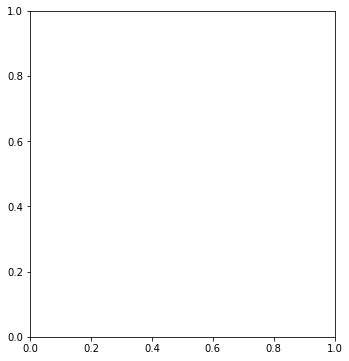

In [ ]:
import matplotlib.pyplot as plt  # Import the Matplotlib library for plotting

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='o')
plt.xlabel('Epoch', fontsize=12)  # Set the x-axis label with fontsize
plt.ylabel('Accuracy', fontsize=12)  # Set the y-axis label with fontsize
plt.legend(loc='lower right', fontsize=12)  # Add a legend with fontsize and position
plt.title('Training and Validation Accuracy', fontsize=14)  # Set the title with fontsize
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines with linestyle and transparency

# Plot training and validation loss
plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, marker='o')
plt.xlabel('Epoch', fontsize=12)  # Set the x-axis label with fontsize
plt.ylabel('Loss', fontsize=12)  # Set the y-axis label with fontsize
plt.legend(loc='upper right', fontsize=12)  # Add a legend with fontsize and position
plt.title('Training and Validation Loss', fontsize=14)  # Set the title with fontsize
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines with linestyle and transparency

# Adjust layout to ensure proper spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# In this step, we use the Matplotlib library to create a figure with two subplots, side by side, for visualizing training and validation metrics.
The plt.figure(figsize=(12, 6)) command creates a figure with a specified size (12 inches in width and 6 inches in height) to make the plot larger and more visually appealing.
We create the first subplot plt.subplot(1, 2, 1) on the left side of the figure and the second subplot plt.subplot(1, 2, 2) on the right side. This arrangement places the training and validation accuracy on the left and the training and validation loss on the right.
For each subplot:
We use plt.plot to plot the training and validation metrics. The linewidth parameter sets the line thickness, and the marker parameter adds markers to data points for better visibility.
We set the x-axis and y-axis labels using plt.xlabel and plt.ylabel, specifying font sizes with fontsize.
plt.legend adds a legend to the plot with the specified fontsize and position.
plt.title sets the title of the subplot with the specified fontsize.
plt.grid adds grid lines to the plot with the specified linestyle and transparency.
The plt.tight_layout() function ensures that subplots are properly spaced and prevents overlapping.
Finally, plt.show() displays the plot.

# Step 15: Save the Model in Native Keras Format

In [ ]:
model.save('my_model.keras')


C:\Users\Aviral\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('model.h5')


In [ ]:
import os

# Specify the base directory where models will be saved
base_directory = r"C:/Users/Aviral/Aviral_Jain_TMA/classification/models"

# Find the latest model version
model_versions = [int(i) for i in os.listdir(base_directory) + [0]]
latest_model_version = max(model_versions) + 1

# Define the directory path for the new model version
model_directory = os.path.join(base_directory, str(latest_model_version))

# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)

# Save the model to the specified directory
model.save(model_directory)


INFO:tensorflow:Assets written to: C:/Users/Aviral/Aviral_Jain_TMA/classification/models\1\assets


INFO:tensorflow:Assets written to: C:/Users/Aviral/Aviral_Jain_TMA/classification/models\1\assets


In [ ]:
# Access accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the final accuracy values (at the last epoch)
final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]

# Print the final accuracy values
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


NameError: name 'history' is not defined

# In this step, we use the model.save method to save the trained model.
The model is saved with the name "trained_model.keras," but you can specify a different file name if needed.
The model will be saved in the native Keras format, which includes the model architecture, weights, and training configuration.
You can later load this saved model using keras.models.load_model("trained_model.keras") if you need to make predictions or continue training.

#    Step 16: Load the Trained Model and Make Predictions

Enter the path to the input image: C:\Users\Aviral\Documents\archive (2)\soybean.leaf.dataset - Copy\diabrotica\diabroticaspeciosa (2).jpg
1/1 [==============================] - 1s 514ms/step


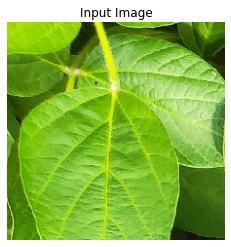

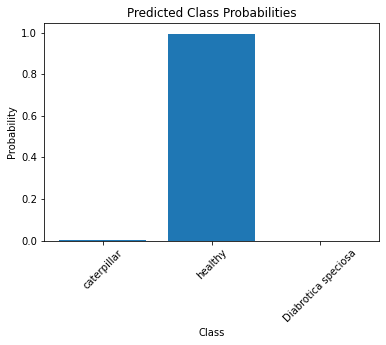

Predicted class: healthy


In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = 224  # Update based on your model's input size
class_names = ['caterpillar' , 'healthy', 'Diabrotica speciosa']  # Update with your class names

# Load the trained model
model = keras.models.load_model("trained_model.h5")  # Replace with your model's file path

# Function to preprocess an input image
def preprocess_input_image(input_image_path):
    """
    Preprocesses an input image by loading, resizing, and adding a batch dimension.

    Args:
        input_image_path (str): The file path to the input image.

    Returns:
        img_array (tf.Tensor): Preprocessed image as a TensorFlow tensor.
    """
    img = image.load_img(input_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add a batch dimension
    return img_array

# Function to make predictions on an input image
def predict_class(input_image_path):
    """
    Predicts the class of an input image using the loaded model.

    Args:
        input_image_path (str): The file path to the input image.

    Returns:
        predicted_class_name (str): The predicted class name.
    """
    # Preprocess the input image
    img_array = preprocess_input_image(input_image_path)

    # Perform prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Get the class name corresponding to the predicted index
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# User input for the image file
input_image_path = input("Enter the path to the input image: ")

try:
    # Predict the class
    predicted_class = predict_class(input_image_path)

    # Display the input image
    img = image.load_img(input_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")

    # Calculate predictions after calling predict_class
    predictions = model.predict(preprocess_input_image(input_image_path))

    # Display the predicted class
    plt.figure()
    plt.bar(class_names, predictions[0])
    plt.title("Predicted Class Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.xticks(rotation=45)
    plt.show()

    print("Predicted class:", predicted_class)
except Exception as e:
    print("An error occurred:", str(e))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = 224  # Update based on your model's input size
class_names = ['caterpillar','healthy','dibrotiacaa']  # Update with your class names

# Load the trained model
model = keras.models.load_model("trained_model.h5")  # Replace with your model's file path

# Function to preprocess an input image
def preprocess_input_image(input_image_path):
    """
    Preprocesses an input image by loading, resizing, and adding a batch dimension.

    Args:
        input_image_path (str): The file path to the input image.

    Returns:
        img_array (tf.Tensor): Preprocessed image as a TensorFlow tensor.
    """
    img = image.load_img(input_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add a batch dimension
    return img_array

# Function to make predictions on an input image
def predict_class(input_image_path):
    """
    Predicts the class of an input image using the loaded model.

    Args:
        input_image_path (str): The file path to the input image.

    Returns:
        predicted_class_name (str): The predicted class name.
    """
    # Preprocess the input image
    img_array = preprocess_input_image(input_image_path)

    # Perform prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Get the class name corresponding to the predicted index
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# User input for the image file
while True:
    user_input = input("Enter the path to the input image (type 'exit' to quit): ")
    
    if user_input.lower() == 'exit':
        break
    
    try:
        # Predict the class
        predicted_class = predict_class(user_input)

        # Display the input image
        img = image.load_img(user_input, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        plt.imshow(img)
        plt.title("Input Image")
        plt.axis("off")

        # Calculate predictions after calling predict_class
        predictions = model.predict(preprocess_input_image(user_input))

        # Display the predicted class
        plt.figure()
        plt.bar(class_names, predictions[0])
        plt.title("Predicted Class Probabilities")
        plt.xlabel("Class")
        plt.ylabel("Probability")
        plt.xticks(rotation=45)
        plt.show()

        print("Predicted class:", predicted_class)
    except Exception as e:
        print("An error occurred:", str(e))


Enter the path to the input image (type 'exit' to quit): exit


In [ ]:
# pip install ipywidgets


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# Define constants
IMAGE_SIZE = 224  # Update based on your model's input size
class_names = ['caterpillar', 'healthy', 'dibrotiacaa']  # Update with your class names

# Load the trained model
model = keras.models.load_model("trained_model.h5")  # Replace with your model's file path

# Function to preprocess an input image
def preprocess_input_image(input_image_path):
    """
    Preprocesses an input image by loading, resizing, and adding a batch dimension.

    Args:
        input_image_path (str): The file path to the input image.

    Returns:
        img_array (tf.Tensor): Preprocessed image as a TensorFlow tensor.
    """
    img = image.load_img(input_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add a batch dimension
    return img_array

# Function to make predictions on an input image
def predict_class(input_image_path):
    """
    Predicts the class of an input image using the loaded model.

    Args:
        input_image_path (str): The file path to the input image.

    Returns:
        predicted_class_name (str): The predicted class name.
    """
    # Preprocess the input image
    img_array = preprocess_input_image(input_image_path)

    # Perform prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Get the class name corresponding to the predicted index
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Function to display the interactive dashboard
def display_dashboard(input_image_path):
    try:
        # Predict the class
        predicted_class = predict_class(input_image_path)

        # Display the input image
        img = image.load_img(input_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        plt.imshow(img)
        plt.title("Input Image")
        plt.axis("off")

        # Calculate predictions after calling predict_class
        predictions = model.predict(preprocess_input_image(input_image_path))

        # Display the predicted class probabilities as a bar chart
        plt.figure(figsize=(8, 4))
        plt.bar(class_names, predictions[0])
        plt.title("Predicted Class Probabilities")
        plt.xlabel("Class")
        plt.ylabel("Probability")
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Provide sample images from the corresponding category
        sample_image_folder = os.path.join(os.path.dirname(input_image_path), predicted_class)
        sample_images = os.listdir(sample_image_folder)[:3]  # Display the first 3 sample images

        if sample_images:
            plt.figure(figsize=(12, 4))
            for i, sample_image in enumerate(sample_images):
                sample_image_path = os.path.join(sample_image_folder, sample_image)
                sample_img = image.load_img(sample_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
                plt.subplot(1, 3, i + 1)
                plt.imshow(sample_img)
                plt.title(f"Sample {i + 1}")
                plt.axis("off")

        plt.show()

        print("Predicted class:", predicted_class)
    except Exception as e:
        print("An error occurred:", str(e))

# Create an interactive widget for user input
input_widget = widgets.Text(
    value='',
    placeholder='Enter the path to the input image...',
    description='Input Image:',
)

# Create an interactive dashboard using the input widget
interact(display_dashboard, input_image_path=input_widget)


interactive(children=(Text(value='', description='Input Image:', placeholder='Enter the path to the input imag…

<function __main__.display_dashboard(input_image_path)>

# In this step, we import the necessary libraries to load a pre-trained machine learning model and use it to make predictions on new data.

We define several constants:

IMAGE_SIZE: This constant represents the size of the input images expected by the model. It should be adjusted to match the input size the model was trained on.
class_names: This list contains the names of the classes or categories that the model can predict. You should update it with the appropriate class names for your specific application.
Next, we load a pre-trained machine learning model using the Keras library. The keras.models.load_model function is used to load a model saved in the native Keras format (.keras). Make sure to replace "trained_model.keras" with the path to your trained model file.

We define two functions:

preprocess_input_image: This function takes the file path to an input image as its argument. It performs preprocessing on the image, which includes loading the image, resizing it to the specified IMAGE_SIZE, and adding a batch dimension. The preprocessed image is returned as a TensorFlow tensor.
predict_class: This function takes the file path to an input image as its argument. It uses the pre-trained model to predict the class of the input image. The function preprocesses the image using the preprocess_input_image function, performs the prediction, and returns the predicted class name as a string.
The user is prompted to provide the path to an input image. This allows the user to specify the image they want to classify using the pre-trained model.

The code attempts to predict the class of the input image using the loaded model. It also displays the input image along with the predicted class name and the predicted class probabilities as a bar chart.

In case of any errors during the process, the code handles exceptions and displays an error message.

Detailed comments within the code provide explanations for each part of the code, making it easier to understand and modify for your specific use case.






# THANKS 

# Now in this project i have deploy on the fastapi using python framework and also make a website and application , and also make a response web pages for the user and also farmer and user who acces the model from the server and also check the disease of the plat and find the disease and perform necessary task and using this 

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 375ms/step


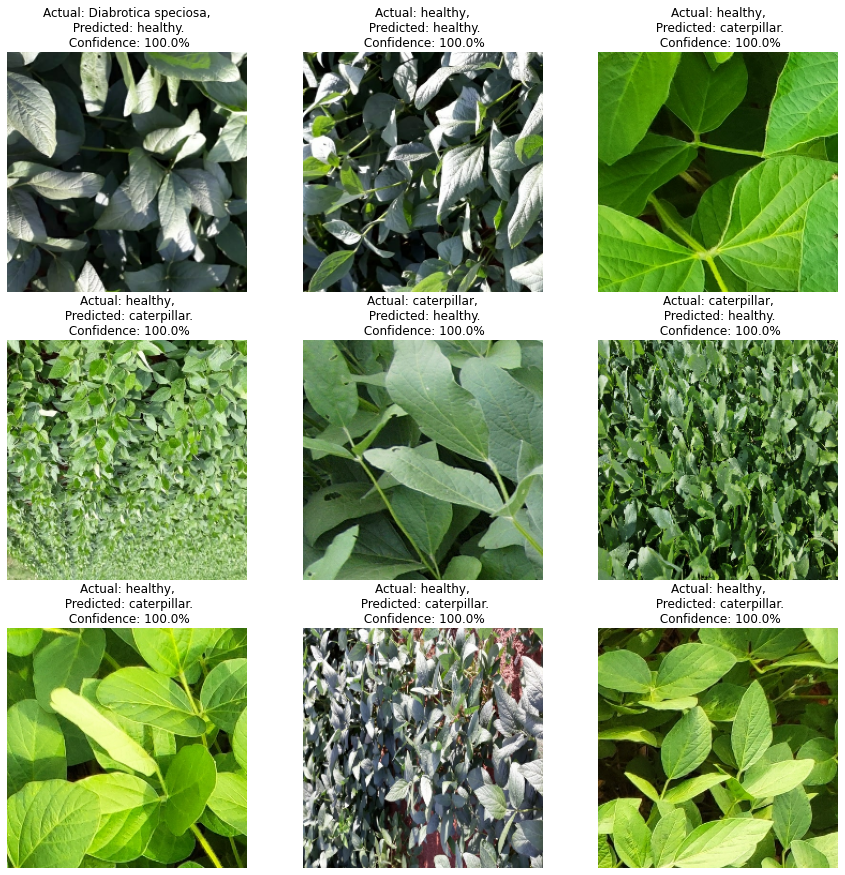

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")